In [12]:
import hdbscan
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as m
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame as df
from IPython.display import clear_output

from sklearn import cluster, datasets

import seaborn as sns

import GPy
import GPclust

%matplotlib notebook
# %matplotlib qt
%config InlineBackend.figure_format = 'retina'

In [2]:
def import_data():
    dataset = pd.read_csv('data/DP.csv',usecols=[27],engine='python',skipfooter=None)
    return dataset
def mean_absolute_percentage_error(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  1  1  1 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  1  1  1  1  1  1  1  0  0  0  1  1  1  2  2 -1 -1 -1  2  2 -1  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3 -1  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4 -1 -1  4  2  2 -1  2  2 -1  1  2  2  2  2  2  2  2  2  2  2
  2  2  2  2

<IPython.core.display.Javascript object>


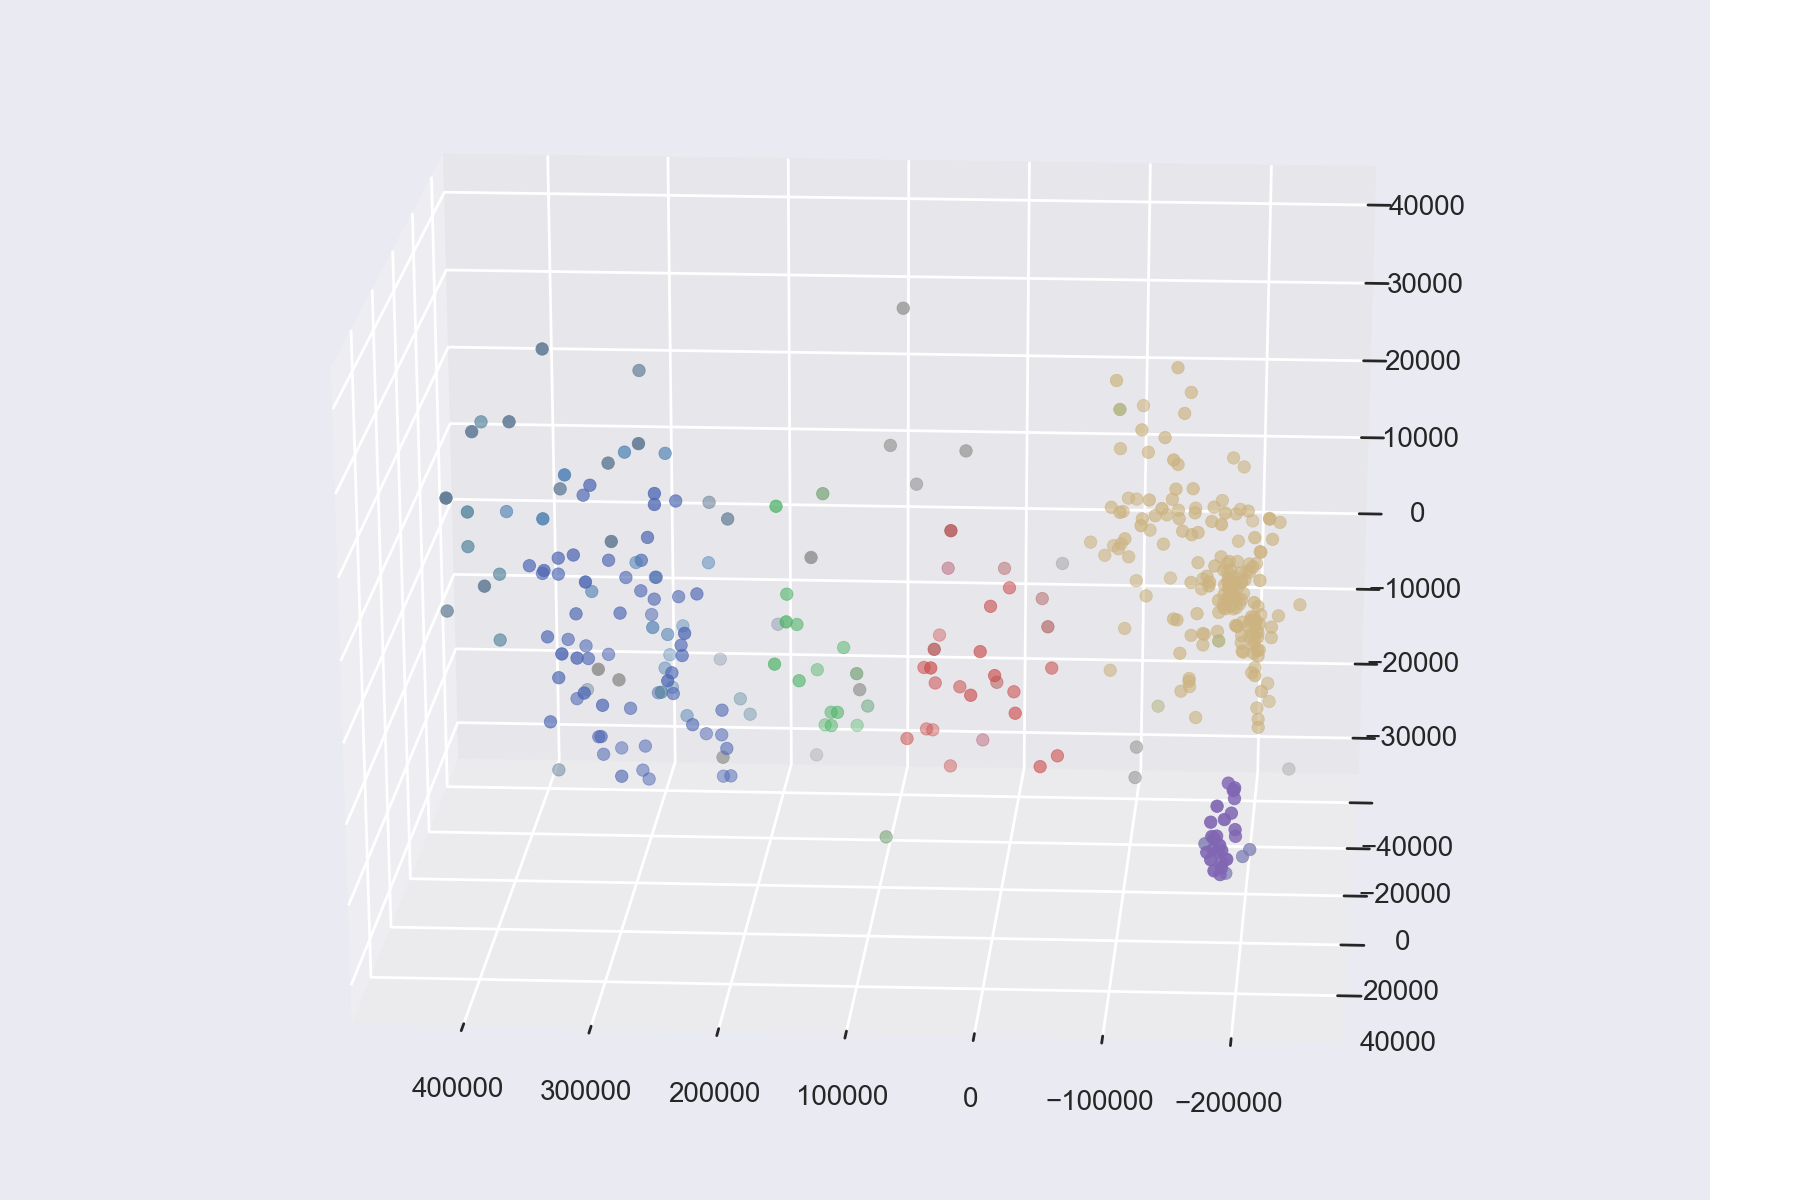

In [26]:
data = import_data()
data= np.array(data)
data= data.reshape(-1,24)

daydataHDBScan= df(data)
daydataHDBScan.index= pd.date_range('2014-1-1', periods=365, freq='D')

HDBScanClusters = hdbscan.HDBSCAN(min_cluster_size=3).fit(daydataHDBScan)
pal = sns.color_palette('deep', 6)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(HDBScanClusters.labels_, 
                                                            HDBScanClusters.probabilities_)]
pca= PCA(n_components=3)
pca.fit(daydataHDBScan)
data_pca =  pca.transform(daydataHDBScan)

# clusterer[[45,46,47]]= clusterer[0]
# clusterer[[84,85,86]]= clusterer[87]
pdHDBScanClusters= pd.DataFrame(HDBScanClusters.labels_,index=daydataHDBScan.index)
print(HDBScanClusters.labels_)
fig = plt.figure(1, figsize=(9, 6))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=135)

x= np.around(colors, decimals=1)


ax.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],cmap=plt.cm.spectral,c=x)



plt.show()

[5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1
 1 1 1 1 5 5 1 1 5 5 5 1 1 1 1 1 1 1 5 5 5 1 5 5 1 5 5 1 1 1 1 1 1 1 5 5 5
 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 3 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 4 0
 0 4 4 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 0 0 0 0 0 0 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 1 1 5 5 5 5 5 5 1 1 1 5 5 5 1 1 1 1 1 1 1 1 1 5 5 5 5]


<IPython.core.display.Javascript object>


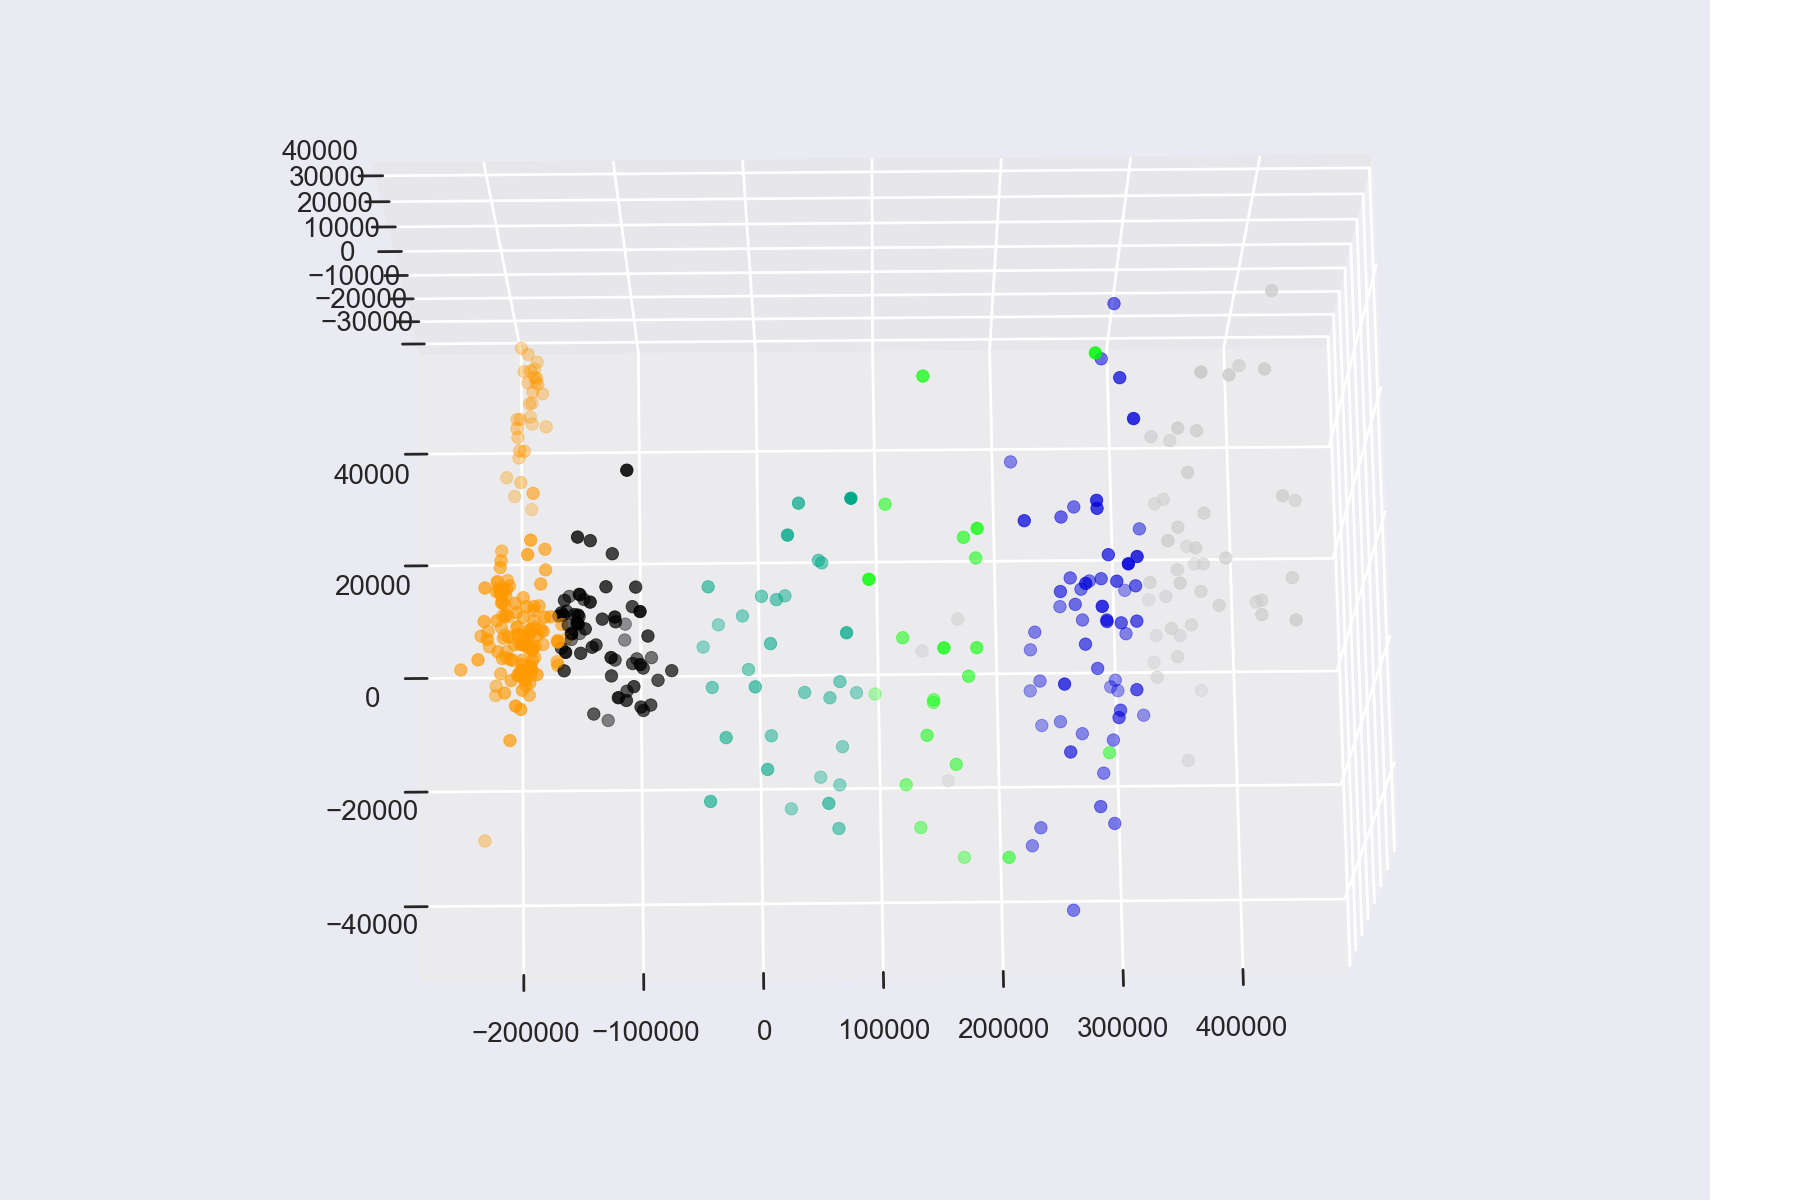

In [92]:
KmeansClusters = cluster.KMeans(n_clusters=6).fit_predict(daydata)
pca= PCA(n_components=3)
pca.fit(daydata)
data_pca =  pca.transform(daydata)

KmeansClusters[[45,46,47]]= KmeansClusters[0]
KmeansClusters[[84,85,86]]= KmeansClusters[87]
# pdClusters= pd.DataFrame(clusters,index=daydata.index)
print(KmeansClusters)
fig = plt.figure(1, figsize=(9, 6))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=135)

ax.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],cmap=plt.cm.spectral,c=KmeansClusters)

plt.show()




In [17]:
data = pd.read_csv('../data/DP.csv',usecols=[27],engine='python',skipfooter=None)

data= np.array(data)
data= data.reshape(-1,24)

daydataGaussianProcess= df(data)
daydataGaussianProcess.index= pd.date_range('2014-1-1', periods=365, freq='D')

x=np.array(range(0,24)).reshape(-1,1)
y=np.array(daydataGaussianProcess)

pca= PCA(n_components=3)
pca.fit(daydataGaussianProcess)
data_pca =  pca.transform(daydataGaussianProcess)

k_underlying = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=12.)
k_corruption = GPy.kern.Matern52(input_dim=1, variance=0.1, lengthscale=12.) + GPy.kern.White(1, variance=0.01)

m = GPclust.MOHGP(x, k_underlying, k_corruption, y, K=20, prior_Z='DP', alpha=1.0)
m.hyperparam_opt_interval = 100 # how often to optimize the hyperparameters

m.hyperparam_opt_args['messages'] = True # turn off the printing of the optimization
m.optimize()
m.systematic_splits(verbose=False)

('\riteration 1 bound=-4.53686485491e+12 grad=1.59627993615e+21, beta=0',)
('\riteration 2 bound=-3.93575388952e+12 grad=0.0, beta=0.0',)
vb converged (gtol)
('\riteration 3 bound=-1558412061.66 grad=0.0, beta=0.0',)
vb converged (gtol)
('\riteration 4 bound=-36209307.6146 grad=0.0, beta=0.0',)
vb converged (gtol)
('\riteration 5 bound=-9088461.41676 grad=8.6183899087e-05, beta=0.0',)
('\riteration 6 bound=-9000208.13877 grad=2.31542467246e-38, beta=6.00144287654e-32',)
vb converged (gtol)
('\riteration 8 bound=-8793914.65895 grad=7.50432324535, beta=5.80015997887e+37',)
('\riteration 9 bound=-8777472.33327 grad=4.82083264958e-37, beta=0.0',)
vb converged (gtol)
('\riteration 10 bound=-6518575.92467 grad=1.01495528872e-74, beta=0.0',)
vb converged (gtol)
('\riteration 11 bound=-6119842.52507 grad=1.55559397709e-26, beta=0.0',)
vb converged (gtol)
('\riteration 12 bound=-5727437.62738 grad=1.52526462861e-103, beta=0.0',)
vb converged (gtol)
('\riteration 13 bound=-5458138.95431 grad=1.7

<IPython.core.display.Javascript object>


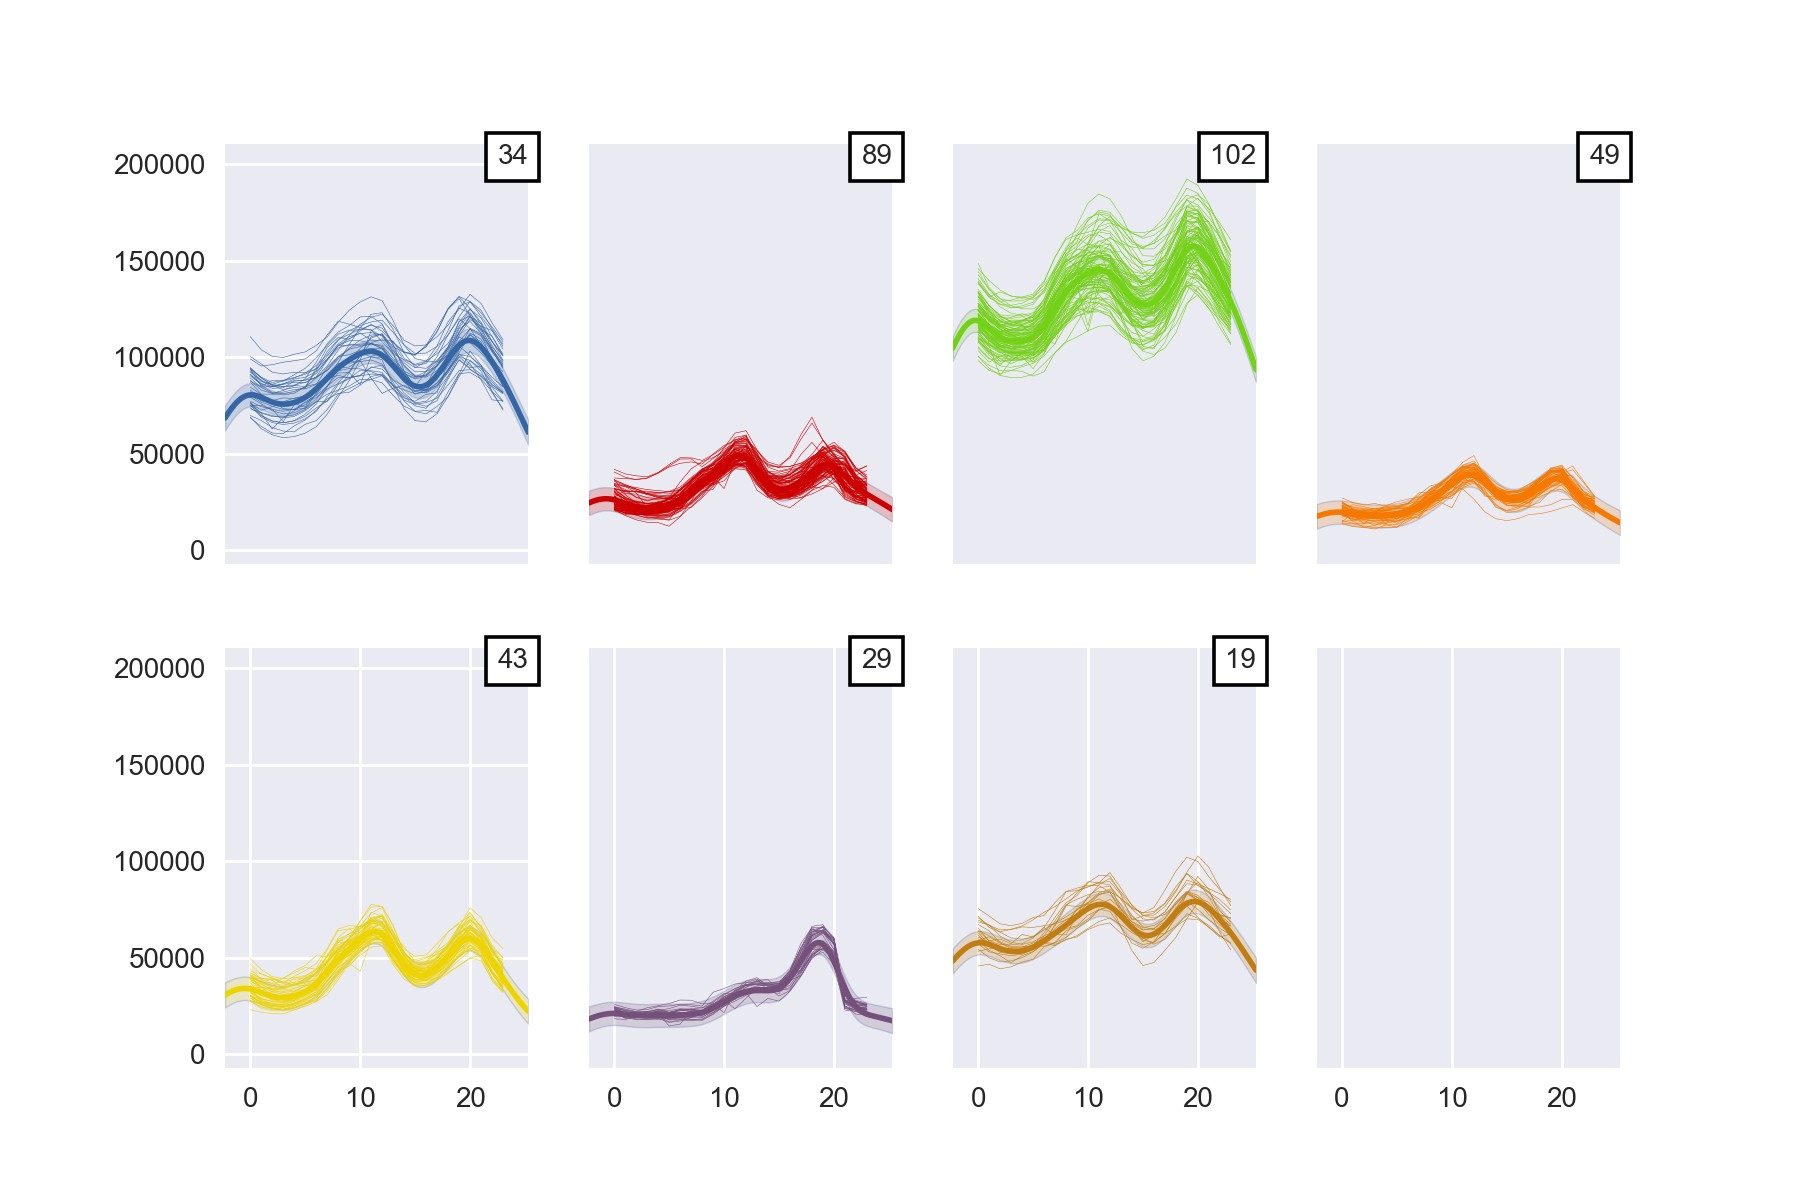

In [23]:
plt.figure(figsize=(9, 6))
m.plot(on_subplots=True, colour=True, newfig=False)
plt.show()



[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 6 6 0 0 0 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1
  1 1 1 4 4 4 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 3 5 5 5 5 5 5
  5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 4 6 6 0 6 0 0 0 0 0 6 6 0 0 0 0 6 6 6 6 6 6 6 6 6 6
  0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]


<IPython.core.display.Javascript object>


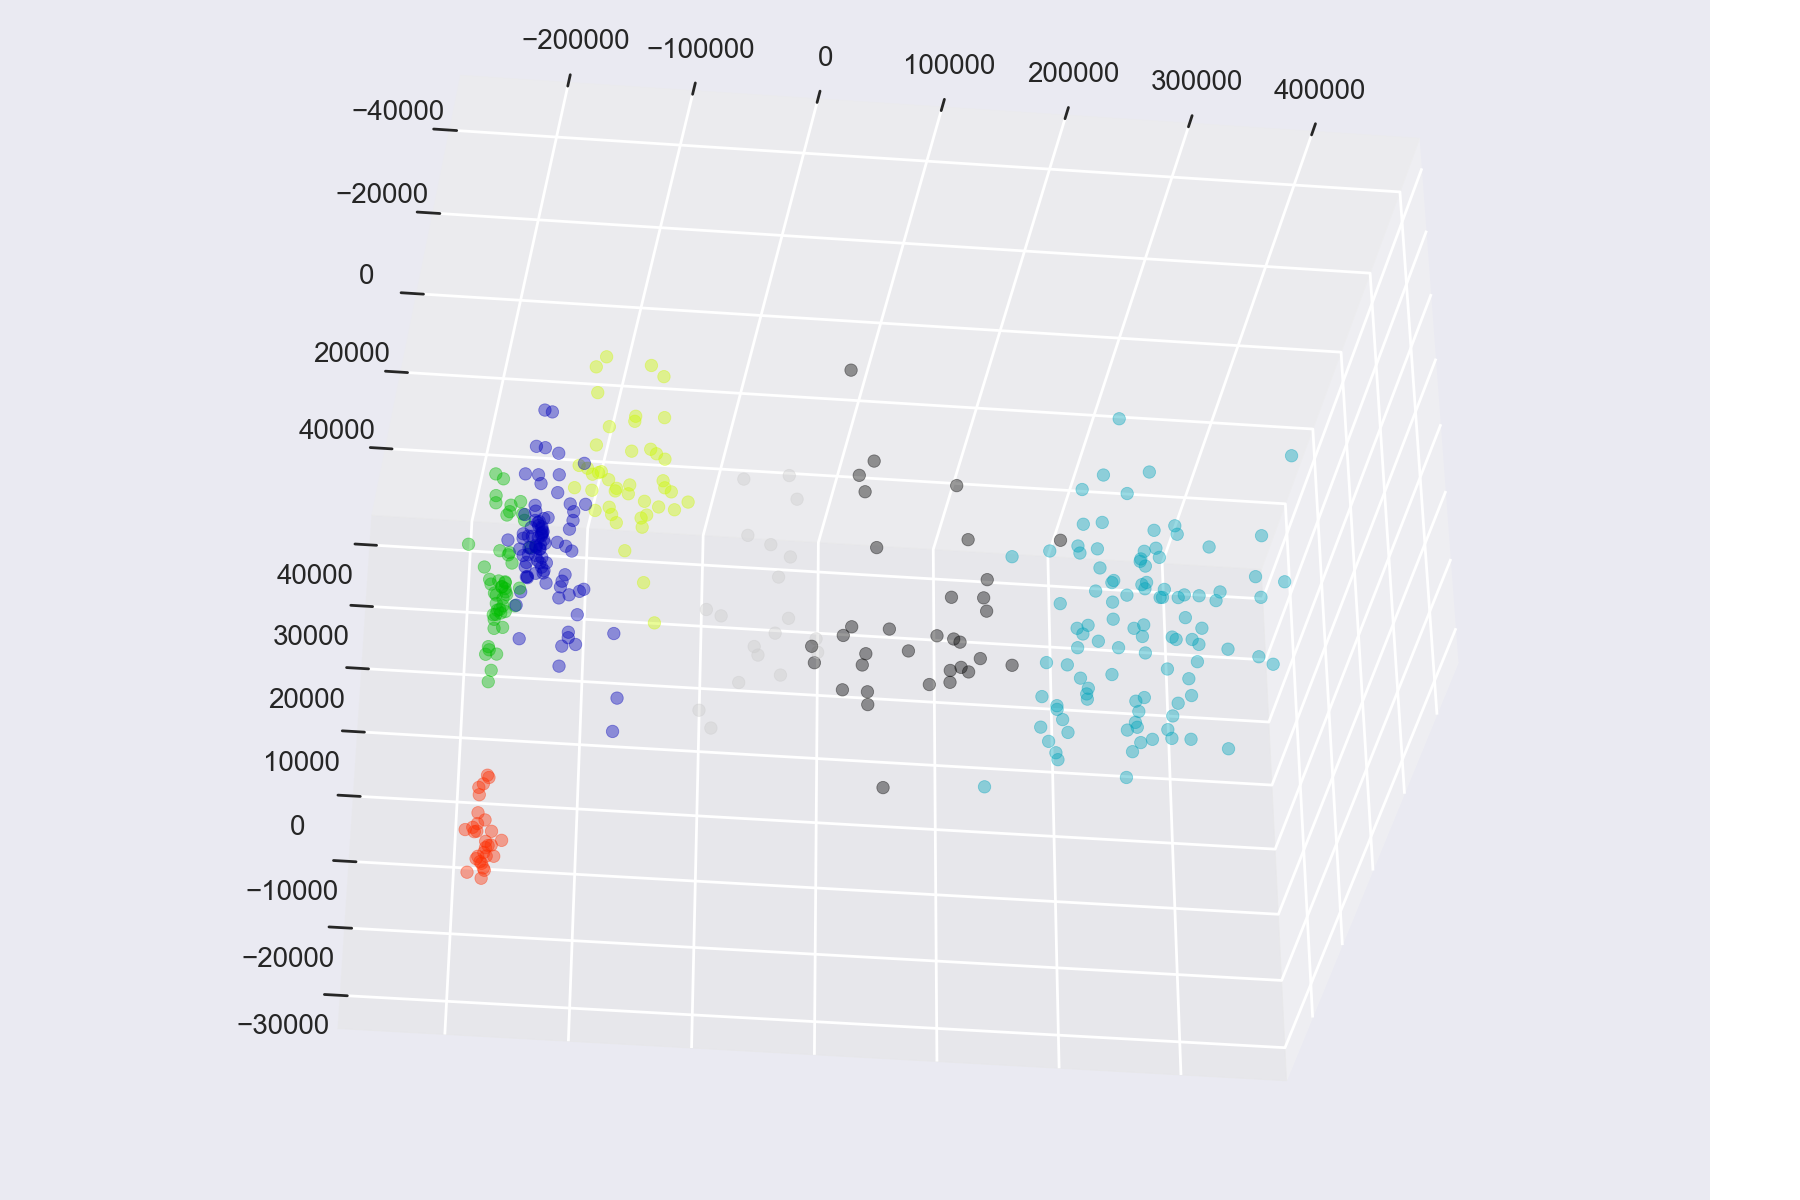

In [32]:
C = np.empty((m.Hgrad.shape[0],1),dtype=int)
for x in range(0,m.Hgrad.shape[0]):
    C[x,0] = m.Hgrad[x].argmin()

print(C.reshape(-1,C.size))


fig = plt.figure(1, figsize=(9,6))


ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=135)


ax.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],cmap=plt.cm.spectral,c=C,alpha=0.4)

plt.show()